# Python Data Science Lib Review Note

## Numpy

Why use Numpy? 

- In Python we have lists that serve the purpose of arrays, but they are slow to process.
- NumPy aims to provide an array object that is up to 50x faster than traditional Python lists.

Why is Numpy faster than Lists?

- A Numpy array is a collection of **homogeneous data-types**. Numpy arrays are stored at one **continuous place in memory** unlike lists (heterogeneous data types stored in non-contiguous memory locations), so processes can access and manipulate them very efficiently.
- The Numpy package breaks down a task into multiple fragments and then processes all the fragments parallelly.
- The Numpy package integrates C, C++, and Fortran codes in Python. These programming languages have very little execution time compared to Python.
- Numpy is optimized to work with latest CPU architectures.

Numpy has a whole sub module dedicated towards matrix or 2-D array operations called `numpy.mat`.

In [1]:
import numpy as np

In [3]:
a = np.array(42)
b = np.array([1, 2, 3, 4, 5])
c = np.array([[1, 2, 3], [4, 5, 6]])
d = np.array([[[1, 2, 3], [4, 5, 6]], [[1, 2, 3], [4, 5, 6]]])

# use .ndim to check the dimension of the array
print(a.ndim)
print(b.ndim)
print(c.ndim)
print(d.ndim)

0
1
2
3


### Access

In [4]:
arr = np.array([[1, 2, 3], [4, 5, 6]])
print(arr[0, 1])

2


In [7]:
arr = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
print(arr[1, 1:4])


arr = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
print(arr[0:2, 2]) 


arr = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
print(arr[0:2, 1:4])

[7 8 9]
[3 8]
[[2 3 4]
 [7 8 9]]


### Data Types

Numpy has some extra data types.

- `i` - integer
- `b` - boolean
- `u` - unsigned integer
- `f` - float
- `c` - complex float
- `m` - timedelta
- `M` - datetime
- `O` - object
- `S` - string
- `U` - unicode string
- `V` - fixed chunk of memory for other type (void)

In [8]:
arr = np.array([1, 2, 3])
print(arr.dtype)

int32


#### Define Data Type

You can define the expected data type of the array elements when creating the array.

In [10]:
arr = np.array([1, 2, 3, 4], dtype='S')

print(arr)
print(arr.dtype) 

[b'1' b'2' b'3' b'4']
|S1


For `i`, `u`, `f`, `S` and `U`, you can define size as well.

In [12]:
arr = np.array([1, 2, 3, 4], dtype='i4')

print(arr)
print(arr.dtype) 

[1 2 3 4]
int64


#### Convert Data Type

In [16]:
arr = np.array([1.1, 2.1, 3.1])

new_arr = arr.astype("i")

print(new_arr)

# or
new_arr = arr.astype(int)

print(new_arr)

[1 2 3]
[1 2 3]


### Array Copy V.S. View

The main difference between a copy and a view of an array is that the copy is a new array, and the view is just a view of the original array.

- The copy owns the data and any changes made to the copy will not affect original array, and any changes made to the original array will not affect the copy.
- The view does not own the data and any changes made to the view will affect the original array, and any changes made to the original array will affect the view.

Use attribute `.base` to check if the array owns data or not. If not, return `None`; otherwise, return the original array. 

In [42]:
arr = np.array([1, 2, 3])

arr_copy = arr.copy()

arr[0] = 0

print(arr)
print(arr_copy)

[0 2 3]
[1 2 3]


In [45]:
arr = np.array([1, 2, 3])

arr_view = arr.view()

arr[0] = 0

print(arr)
print(arr_view)


# changes made to view will affect the original array
arr_view[0] = 10

print(arr)
print(arr_view)

[0 2 3]
[0 2 3]
[10  2  3]
[10  2  3]


In [49]:
arr = np.array([1, 2, 3])
arr_copy = arr.copy()
arr_view = arr.view()

print(arr_copy.base)
print(arr_view.base)

None
[1 2 3]


### Shape

In [55]:
# specify dimension of an array
arr = np.array([1, 2, 3, 4], ndmin=5)

print(arr)
print(arr.ndim)
print(arr.shape)

[[[[[1 2 3 4]]]]]
5
(1, 1, 1, 1, 4)


### Reshape

The number of elements must be equal before and after reshaping. Otherwise, error.

The return of `reshape()` is a view of the original array.

In [56]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8])

# if you do not know the number of one dimension, 
# you can specify "-1", Numpy will calculate it for you
new_arr = arr.reshape(2, 2, -1)

print(new_arr) 
print(new_arr.shape)

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
(2, 2, 2)


You can **flatten** a multidimensional array into a 1D array by `reshape(-1)`.

In [61]:
arr = np.array([[1, 2, 3], [4, 5, 6]])

new_arr = arr.reshape(-1)

print(new_arr) 

[1 2 3 4 5 6]


In [62]:
np.array([1, 2, 3]).shape

(3,)

### Iterate

#### `for`

In [70]:
arr = np.array([1, 2, 3])

for x in arr:
  print(x) 

1
2
3


In [72]:
arr = np.array([[1, 2, 3], [4, 5, 6]])

for x in arr:
  print(x) 

for x in arr:
  for y in x:
    print(y) 

[1 2 3]
[4 5 6]
1
2
3
4
5
6


#### `nditer()`

In [73]:
arr = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

# use nditer, then do not need to loop multiple times
for x in np.nditer(arr):
  print(x) 

1
2
3
4
5
6
7
8


If you want to change the data type of element while iterating the array, use arg `op_dtypes`.

Numpy does not change the data type in place, so it needs buffer space to perform this action. 

In [74]:
arr = np.array([1, 2, 3])

for x in np.nditer(arr, flags=["buffered"], op_dtypes=["S"]):
    print(x)

b'1'
b'2'
b'3'


In [75]:
arr = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])

for x in np.nditer(arr[:, ::2]):  # iterate with step 2
  print(x) 

1
3
5
7


#### `ndenumerate()`

In [78]:
arr = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])

for idx, x in np.ndenumerate(arr):
  print(idx, x) 

(0, 0) 1
(0, 1) 2
(0, 2) 3
(0, 3) 4
(1, 0) 5
(1, 1) 6
(1, 2) 7
(1, 3) 8


### Combine / Merge / Concatenate

You can concatenate arrays horizontally or vertically by specifying arg `axis`.

#### `concatenate()`

In [83]:
arr1 = np.array([1, 2, 3])

arr2 = np.array([4, 5, 6])

arr = np.concatenate((arr1, arr2))  # 1-D array can only be concatenated horizontally

print(arr) 

[1 2 3 4 5 6]


In [81]:
arr1 = np.array([[1, 2], [3, 4]])

arr2 = np.array([[5, 6], [7, 8]])

# concatenate vertically
arr = np.concatenate((arr1, arr2))  # by default, axis = 0

print(arr) 


# concatenate horizontally
arr = np.concatenate((arr1, arr2), axis=1)

print(arr) 

[[1 2]
 [3 4]
 [5 6]
 [7 8]]
[[1 2 5 6]
 [3 4 7 8]]


#### `stack()`, `hstack()`, `vstack()`, `dstack()`

In [86]:
arr1 = np.array([1, 2, 3])

arr2 = np.array([4, 5, 6])

arr = np.stack((arr1, arr2))

print(arr) 


arr = np.stack((arr1, arr2), axis=1)

print(arr) 

[[1 2 3]
 [4 5 6]]
[[1 4]
 [2 5]
 [3 6]]


In [92]:
arr1 = np.array([1, 2, 3])

arr2 = np.array([4, 5, 6])

# stack horizontally
arr = np.hstack((arr1, arr2))

print(arr) 

# stack vertically
arr = np.vstack((arr1, arr2))

print(arr) 

# stack with depth same as height
arr = np.dstack((arr1, arr2))

print(arr) 

[1 2 3 4 5 6]
[[1 2 3]
 [4 5 6]]
[[[1 4]
  [2 5]
  [3 6]]]


### Split

- `split()` does not automatically adjust if the array cannot be split in an equal size.
- `array_split()` does.

You can split arrays horizontally or vertically by specifying arg `axis`.

- `hsplit()` opposite of `hstack()`
- `vsplit()` opposite of `vstack()`
- `dsplit()` opposite of `dstack()`

In [97]:
arr = np.array([1, 2, 3, 4, 5, 6])

newarr = np.array_split(arr, 3)

print(newarr) 

# or
newarr = np.split(arr, 3)

print(newarr) 

[array([1, 2]), array([3, 4]), array([5, 6])]
[array([1, 2]), array([3, 4]), array([5, 6])]


In [98]:
arr = np.array([1, 2, 3, 4, 5, 6])

newarr = np.array_split(arr, 4)

print(newarr) 

# not work
newarr = np.split(arr, 4)

print(newarr) 

[array([1, 2]), array([3, 4]), array([5]), array([6])]


ValueError: array split does not result in an equal division

In [99]:
arr = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12]])

newarr = np.array_split(arr, 3)

print(newarr) 

[array([[1, 2],
       [3, 4]]), array([[5, 6],
       [7, 8]]), array([[ 9, 10],
       [11, 12]])]


In [101]:
arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15], [16, 17, 18]])

# split horizontally
newarr = np.array_split(arr, 3, axis=1)  

print(newarr) 

# or
newarr = np.hsplit(arr, 3)

print(newarr) 

[array([[ 1],
       [ 4],
       [ 7],
       [10],
       [13],
       [16]]), array([[ 2],
       [ 5],
       [ 8],
       [11],
       [14],
       [17]]), array([[ 3],
       [ 6],
       [ 9],
       [12],
       [15],
       [18]])]
[array([[ 1],
       [ 4],
       [ 7],
       [10],
       [13],
       [16]]), array([[ 2],
       [ 5],
       [ 8],
       [11],
       [14],
       [17]]), array([[ 3],
       [ 6],
       [ 9],
       [12],
       [15],
       [18]])]


### Search

Return indexes of the matched elements.

In [102]:
arr = np.array([1, 2, 3, 4, 5, 4, 4])

x = np.where(arr == 4)

print(x)

(array([3, 5, 6], dtype=int64),)


`searchsorted()` performs a binary search in the sorted arrays. 

It returns the index where the value to search would be inserted to maintain the order of the array.

If there are duplicates, return the index of the first matched element.

In [109]:
arr = np.array([6, 7, 8, 9])

x = np.searchsorted(arr, 7)

print(x) 

x = np.searchsorted(arr, 5)

print(x) 

1
0


`searchsorted()` can be performed from right side to left by specifying arg `side="right"`.

In [106]:
arr = np.array([6, 7, 8, 9])

x = np.searchsorted(arr, 7, side="right")

print(x) 

2


In [110]:
arr = np.array([1, 3, 5, 7])

x = np.searchsorted(arr, [2, 4, 6])

print(x) 

[1 2 3]


### Sort

Not in-place.

In [114]:
arr = np.array([3, 2, 0, 1])

print(np.sort(arr))

[0 1 2 3]


In [115]:
arr = np.array([True, False, True])

print(np.sort(arr)) 

[False  True  True]


In [116]:
arr = np.array([[3, 2, 4], [5, 0, 1]])

print(np.sort(arr)) 

[[2 3 4]
 [0 1 5]]


### Filter

You can filter an array using a boolean index list.

In [117]:
arr = np.array([1, 2, 3, 4])

x = [True, False, True, False]

newarr = arr[x]

print(newarr) 

[1 3]


In [122]:
arr = np.array([1, 2, 3, 4])

filter_arr_index = []

for element in arr:
  if element > 2:
    filter_arr_index.append(True)
  else:
    filter_arr_index.append(False)

newarr = arr[filter_arr_index]

print(filter_arr_index)
print(newarr) 


# or
newarr = arr[arr > 2]
print(newarr) 

[False, False, True, True]
[3 4]
[3 4]


---

## Pandas

In [124]:
import pandas as pd

### Series

A Pandas Series is like a column in a table.

#### Lables

Lables are indexes. If nothing else is specified, the values are labeled with their index number. 

This label can be used to access a specified value.

In [137]:
a = [1, 7, 2]

myvar = pd.Series(a)

print(myvar)


0    1
1    7
2    2
dtype: int64


In [138]:
print(myvar[0])

1


In [132]:
a = [1, 7, 2]

myvar = pd.Series(a, index = ["x", "y", "z"])

print(myvar)

x    1
y    7
z    2
dtype: int64


In [133]:
calories = {"day1": 420, "day2": 380, "day3": 390}

myvar = pd.Series(calories)

print(myvar)

day1    420
day2    380
day3    390
dtype: int64


In [135]:
calories = {"day1": 420, "day2": 380, "day3": 390}

myvar = pd.Series(calories, index = ["day1", "day2"])

print(myvar)

day1    420
day2    380
dtype: int64


### DataFrames

In [129]:
car_dict = {
  'cars': ["BMW", "Volvo", "Ford"],
  'passings': [3, 7, 2]
}

car_df = pd.DataFrame(car_dict)

print(car_df) 

    cars  passings
0    BMW         3
1  Volvo         7
2   Ford         2


#### Locate

- `loc[]`: locate by lable/index name.


In [139]:
print(car_df.loc[0])

cars        BMW
passings      3
Name: 0, dtype: object


In [143]:
print(car_df.loc[[0, 1]])

    cars  passings
0    BMW         3
1  Volvo         7


In [148]:
data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}

df = pd.DataFrame(data, index = ["day1", "day2", "day3"])

print(df) 

      calories  duration
day1       420        50
day2       380        40
day3       390        45


In [146]:
print(df.loc["day2"])

calories    380
duration     40
Name: day2, dtype: int64


In [150]:
print(df.loc[["day2", "day3"]])

      calories  duration
day2       380        40
day3       390        45


In [151]:
print(df.loc["day2", "calories"])

380


### Read CSV

If you have a large DataFrame with many rows, Pandas will only return the first 5 rows, and the last 5 rows.

Use `to_string()` to print the entire DataFrame.

You can configure the max number of rows using setting `pd.options.display.max_rows`.

In [ ]:
df = pd.read_csv('data/data.csv')

In [159]:
print(df.to_string()) 

     Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
5          60    102       127     300.0
6          60    110       136     374.0
7          45    104       134     253.3
8          30    109       133     195.1
9          60     98       124     269.0
10         60    103       147     329.3
11         60    100       120     250.7
12         60    106       128     345.3
13         60    104       132     379.3
14         60     98       123     275.0
15         60     98       120     215.2
16         60    100       120     300.0
17         45     90       112       NaN
18         60    103       123     323.0
19         45     97       125     243.0
20         60    108       131     364.2
21         45    100       119     282.0
22         60    130       101     300.0
23         45   

In [154]:
print(pd.options.display.max_rows) 

60


### Read JSON

You can read data from JSON string or a JSON file.

In [157]:
data = {
  "Duration":{
    "0":60,
    "1":60,
    "2":60,
    "3":45,
    "4":45,
    "5":60
  },
  "Calories":{
    "0":409,
    "1":479,
    "2":340,
    "3":282,
    "4":406,
    "5":300
  }
}

df = pd.DataFrame(data)

print(df) 

   Duration  Calories
0        60       409
1        60       479
2        60       340
3        45       282
4        45       406
5        60       300


### Analyzing Data

In [163]:
print(df.head())

   Duration  Pulse  Maxpulse  Calories
0        60    110       130     409.1
1        60    117       145     479.0
2        60    103       135     340.0
3        45    109       175     282.4
4        45    117       148     406.0


In [164]:
print(df.tail())

     Duration  Pulse  Maxpulse  Calories
164        60    105       140     290.8
165        60    110       145     300.0
166        60    115       145     310.2
167        75    120       150     320.4
168        75    125       150     330.4


In [162]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
Duration    169 non-null int64
Pulse       169 non-null int64
Maxpulse    169 non-null int64
Calories    164 non-null float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB
None


---

## Matplotlib

In [63]:
import matplotlib.pyplot as plt

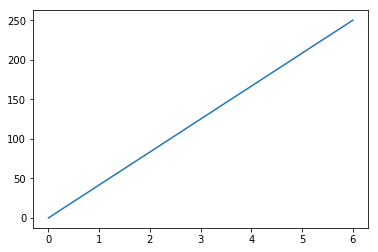

In [64]:
xpoints = np.array([0, 6])
ypoints = np.array([0, 250])

plt.plot(xpoints, ypoints)
plt.show()